In [17]:
#impor perpustakaan pandas
import pandas as pd


In [18]:
#memuat kumpulan data
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
#variabel fitur
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,4,114,64,0,0,28.9,0.126,24
996,0,137,84,27,0,27.3,0.231,59
997,2,105,80,45,191,33.7,0.711,29
998,7,114,76,17,110,23.8,0.466,31


In [20]:
#variabel sasaran
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    1
998    0
999    0
Name: Outcome, Length: 1000, dtype: int64

In [21]:
from sklearn.tree import DecisionTreeClassifier # Impor Pengklasifikasi Pohon Keputusan
from sklearn.model_selection import train_test_split # Impor fungsi train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [22]:
# Buat objek classifer Pohon Keputusan
model = DecisionTreeClassifier()

# Melatih Pengklasifikasi Pohon Keputusan
model = model.fit(x_train,y_train)

#Memprediksi respons untuk kumpulan data pengujian
y_pred = model.predict(x_test)

In [23]:
#Evaluasi menggunakan skor Akurasi
from sklearn import metrics #Impor modul metrik scikit-learn untuk perhitungan akurasi
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 86.0


In [24]:
#Evaluasi menggunakan matriks Confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[126,  15],
       [ 13,  46]])

In [25]:
print("Accuracy:",((82+27)/154))

Accuracy: 0.7077922077922078


In [26]:
#Evaluasi menggunakan laporan Klasifikasi
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.89      0.90       141
           1       0.75      0.78      0.77        59

    accuracy                           0.86       200
   macro avg       0.83      0.84      0.83       200
weighted avg       0.86      0.86      0.86       200



In [27]:
#memeriksa nilai prediksi
model.predict([[6,148,72,35,0,33.6,0.627,50]])


array([1])

In [28]:
#Impor modul untuk Memvisualisasikan Pohon Keputusan
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [29]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

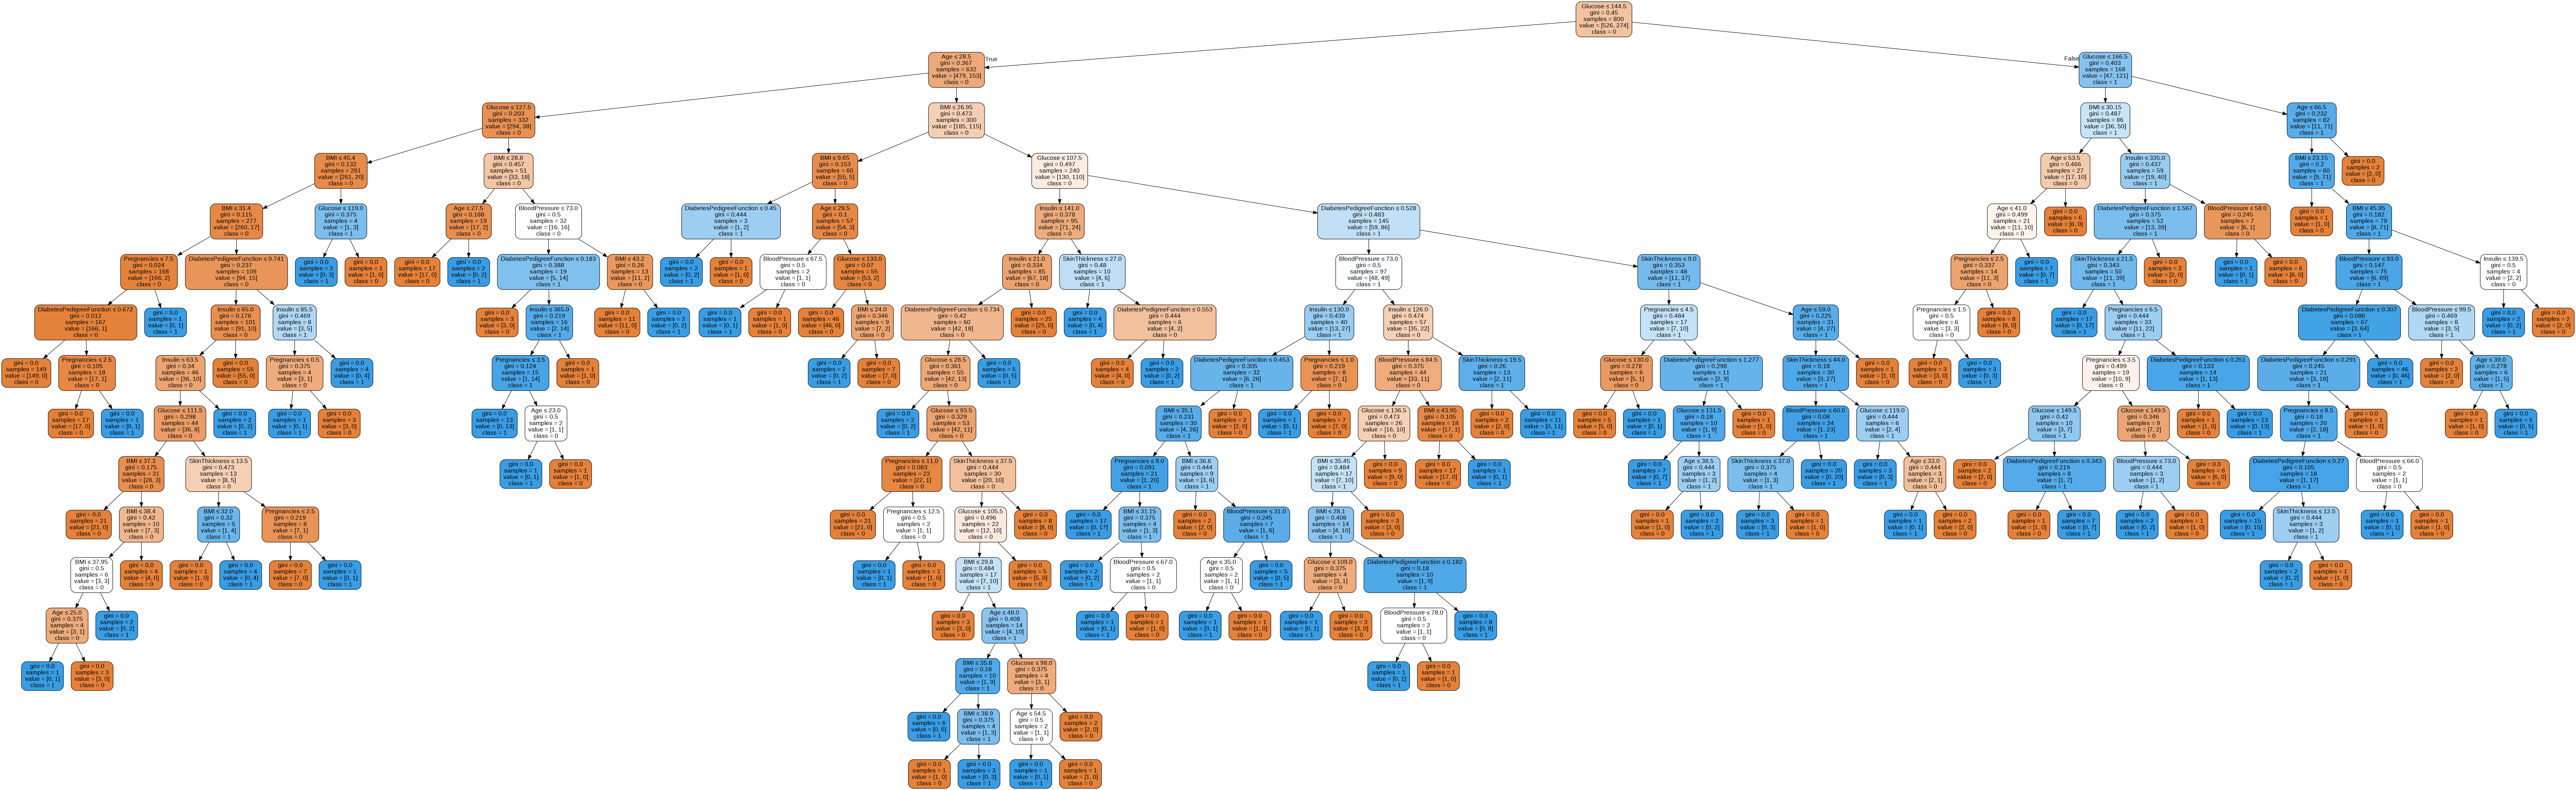

In [30]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [31]:
# Buat objek classifer Pohon Keputusan
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Melatih Pengklasifikasi Pohon Keputusan
model = model.fit(x_train,y_train)

#Memprediksi respons untuk kumpulan data pengujian
y_pred = model.predict(x_test)

# Akurasi Model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 78.5


The classification rate increased to 79.87%, which is better accuracy than the previous model.



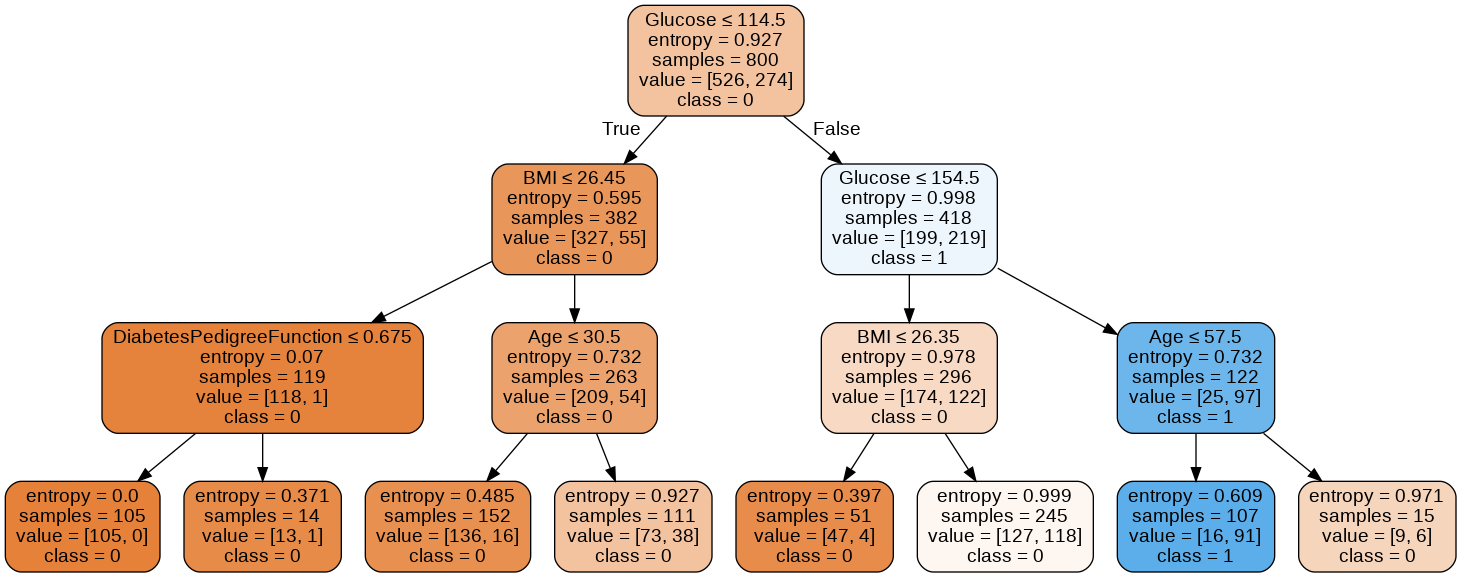

In [32]:
#Visualisasi Pohon Keputusan yang Lebih Baik
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())